Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

In [1]:
using Pkg

In [2]:

Pkg.add("Roots")
Pkg.add("ForwardDiff")


  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %           ]  71.4 % Resolving package versions...
 Installed Roots ─ v0.7.4
  Updating `~/.julia/environments/v1.0/Project.toml`
  [f2b01f46] + Roots v0.7.4
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [f2b01f46] + Roots v0.7.4
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [f6369f11] + ForwardDiff v0.10.1
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [3]:
using Roots  
using Plots
using ForwardDiff

┌ Info: Precompiling Roots [f2b01f46-fcfa-551c-844a-d8ac1e96c665]
└ @ Base loading.jl:1189


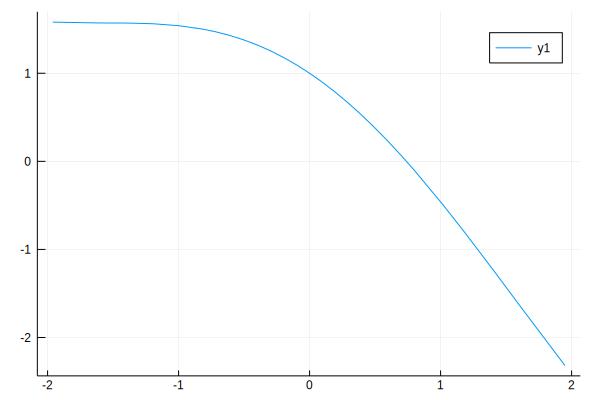

In [4]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [5]:
x = find_zero(f, (0, 1))  

0.7390851332151607

In [6]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection())  

0.7390851332151607

uwaga: w przypadku bisekcji nie działają dodatkowe opcje np verbose=true (bug?)

#### Sprawdzanie, czy znaleźliśmy 0

In [8]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [9]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) *sign(f(nextfloat(x))) 

-1.0

In [10]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.1415926535897936, -3.216245299353273e-16)

In [11]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [12]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

1.2 Metoda regula falsi

In [13]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 1.0000000000000000,  0.5000000000000000)
(a_2, b_2) = ( 1.0000000000000000,  0.6370453475297477)
(a_3, b_3) = ( 1.0000000000000000,  0.7205529551767942)
(a_4, b_4) = ( 1.0000000000000000,  0.7383229967452796)
(a_5, b_5) = ( 0.7383229967452796,  0.7390860519740818)
(a_6, b_6) = ( 0.7390860519740818,  0.7390851330604866)
(a_7, b_7) = ( 0.7390860519740818,  0.7390851332151606)



0.7390851332151606

In [14]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: FalsePosition{12}()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 1.0000000000000000,  0.5000000000000000)
(a_2, b_2) = ( 1.0000000000000000,  0.6370453475297477)
(a_3, b_3) = ( 1.0000000000000000,  0.7205529551767942)
(a_4, b_4) = ( 1.0000000000000000,  0.7383229967452796)
(a_5, b_5) = ( 0.7383229967452796,  0.7390860519740818)
(a_6, b_6) = ( 0.7390860519740818,  0.7390851330604866)
(a_7, b_7) = ( 0.7390860519740818,  0.7390851332151606)



0.7390851332151606

### 2.Metody korzytające z pochodnych

2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [15]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

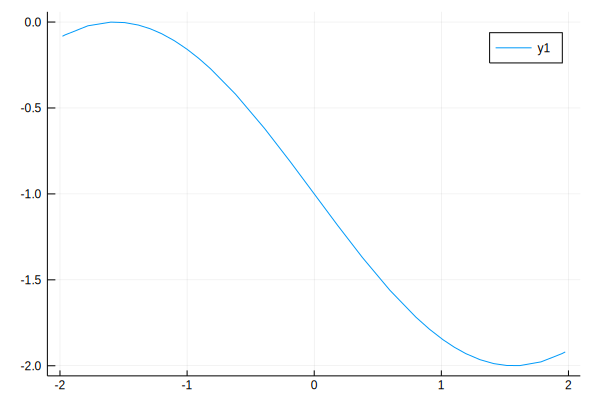

In [16]:
plot(D(f), -2,2)

In [17]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  1.0000000000000000,	 fx_1 = -0.4596976941318602
x_2 =  0.7503638678402439,	 fx_2 = -0.0189230738221174
x_3 =  0.7391128909113617,	 fx_3 = -0.0000464558989908
x_4 =  0.7390851333852840,	 fx_4 = -0.0000000002847206
x_5 =  0.7390851332151607,	 fx_5 =  0.0000000000000000



0.7390851332151607

2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [18]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.6666666666666666,	 fx_1 =  0.1192205941102814
x_2 =  0.7390392624463102,	 fx_2 =  0.0000767690929604
x_3 =  0.7390851332151495,	 fx_3 =  0.0000000000000187
x_4 =  0.7390851332151606,	 fx_4 =  0.0000000000000001



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [19]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 2
* function evaluations: 11
* Note: Exact zero found. Bracketing used over (0.0, 0.9999969722835395), those steps not shown. 

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


3.2 Metoda siecznych

In [20]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Secant()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835395,	 fx_1 = -0.4596921186823245
x_2 =  0.6850738998209051,	 fx_2 =  0.0892983907342114
x_3 =  0.7362990541607765,	 fx_3 =  0.0046599445167861
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851121285389,	 fx_5 =  0.0000000352908237
x_6 =  0.7390851332150014,	 fx_6 =  0.0000000000002666
x_7 =  0.7390851332151607,	 fx_7 =  0.0000000000000000



0.7390851332151607

In [21]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [22]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

3.3 Metoda Steffensena 
przybliża pochodną poprzez  (f(x + f(x)) - f(x))/f(x)  
aby ja wywołać podajemy punkt startowy oraz order 2

In [23]:

x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Steffensen()
* iterations: 6
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835395,	 fx_1 = -0.4596921186823245
x_2 =  0.6850738998209051,	 fx_2 =  0.0892983907342114
x_3 =  0.7362990541607765,	 fx_3 =  0.0046599445167861
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851330409081,	 fx_5 =  0.0000000002916313
x_6 =  0.7390851332151607,	 fx_6 =  0.0000000000000000



0.7390851332151607

In [24]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order16(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order16()
* iterations: 2
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.7401877925386848,	 fx_1 = -0.0018458730685117
x_2 =  0.7390851332151607,	 fx_2 =  0.0000000000000000



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

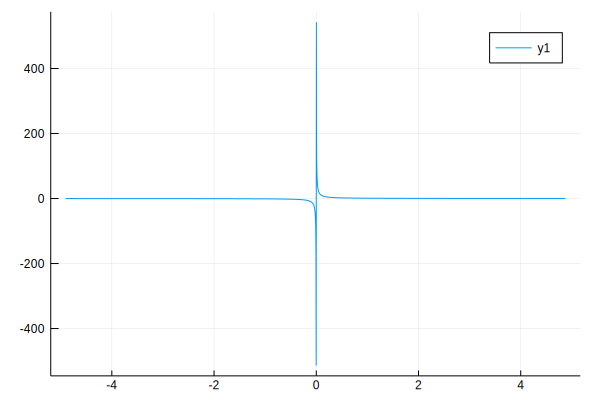

In [25]:
plot(x -> 1/x)

In [26]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = (-1.0000000000000000,  0.0000000000000000)
(a_1, b_1) = (-0.0000000000000000,  0.0000000000000000)
(a_2, b_2) = (-0.0000000000000000,  0.0000000000000000)
(a_3, b_3) = (-0.0000000000000000,  0.0000000000000000)
(a_4, b_4) = (-0.0000000000000000,  0.0000000000000000)
(a_5, b_5) = (-0.0000000000000000,  0.0000000000000000)
(a_6, b_6) = (-0.0000000000000000,  0.0000000000000000)
(a_7, b_7) = (-0.0000000000000000,  0.0000000000000000)
(a_8, b_8) = (-0.0000000000000000,  0.0000000000000000)
(a_9, b_9) = (-0.0000000000000000,  0.0000000000000000)
(a_10, b_10) = (-0.0000000000000000,  0.0000000000000000)
(a_11, b_11) = (-0.0000000000000000,  0.0000000000000000)
(a_12, b_12) = (-0.0000000000000000,  0.0000000000000000)
(a_13, b_13) = (-0.0000

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [24]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Array{Float64,1}:
 0.0
 3.0

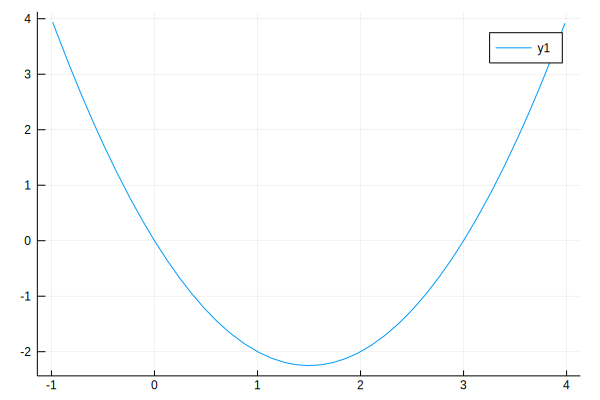

In [25]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://github.com/JuliaMath/Roots.jl/blob/master/doc/roots.ipynb

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

1.Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b> Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b>

2.Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej.

3.Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)

B. Namalowac <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny.